In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Set font size when plotting
plt.rcParams.update({'font.size': 16})

### Read in all results files (.txt) for the various implementations and extract key metrics to create averages based on 10 runs with each N used for each implementation. IMPORTANT - all tests based on random seed set to 42.

In [2]:
Ns = np.linspace(1000, 10000, 10, dtype=np.int32)
num_runs = 10

# Stores average largest eigenvalue with increasing N for different implementations
eig_serial = []
eig_openmp = []
eig_avx = []
eig_cuda = []

# Stores average total initialisation time with increasing N for different implementations
init_serial = []
init_openmp = []
init_avx = []
init_cuda = []

# Stores average total time used by MatrixVectorMultiply() with increasing N for different implementations
matvecmul_serial = []
matvecmul_openmp = []
matvecmul_avx = []
matvecmul_cuda = []

# Stores average time used per MatrixVectorMultiply() call with increasing N for different implementations
per_matvecmul_serial = []
per_matvecmul_openmp = []
per_matvecmul_avx = []
per_matvecmul_cuda = []

# Stores average total time by each implementation with increasing N (both serial + parallel parts)
total_serial = []
total_openmp = []
total_avx = []
total_cuda = []

In [3]:
cwd = os.getcwd()
# Results stored in within subfolders in "Results" folder
folder = "Results"
os.chdir(folder)

# Preprocess results data for each implementation for plotting
for sub_folder in ["Serial", "OpenMP", "AVX", "CUDA"]:
    try:
        os.chdir(sub_folder)
    except:
        os.chdir("..\\" + sub_folder)
        
    file = open(sub_folder.lower() + "_results.txt", "r")
    for line in file.readlines():
        # Find test run number between [1, 10]
        if "run" in line:
            run = int(line.rstrip("\n")[-1])
            # Initialise temp variables
            if run == 1:
                # Sums largest eigenvalue
                sum_eig = 0
                # Sums total initialisation time
                sum_init = 0
                # Sums total time used by MatrixVectorMultiply()
                sum_matvecmul = 0
                # Sums time used per MatrixVectorMultiply() call
                sum_per_matvecmul = 0
                # Sums total runtime
                sum_total = 0
            elif run == 0:
                run = 10

        # Adds data to relevant sum variable as described above
        if "The largest eigenvalue is:" in line:
            sum_eig += float(line.rstrip("\n").split()[-1])
        elif "Time spent in initialization:" in line:
            sum_init += float(line.rstrip("\n").split()[-2])
        elif "Of which the multiply function used:" in line:
            sum_matvecmul += float(line.rstrip("\n").split()[-2])
            sum_total += float(line.rstrip("\n").split()[-2])
        elif "Time per matrix-vector multiplication:" in line:
            sum_per_matvecmul += float(line.rstrip("\n").split()[-2])
        elif "Total serial (initialization + solver):" in line:
            sum_total += float(line.rstrip("\n").split()[-2])

        # Find average metrics for given N and implementation based on 10 runs. Divide some metrics
        # by 1000 to store in milliseconds (ms) rather than microseconds (us)
        if run == num_runs and line == "\n":
            if sub_folder == "Serial":
                eig_serial.append(sum_eig/num_runs)
                init_serial.append(sum_init/num_runs/1000)
                matvecmul_serial.append(sum_matvecmul/num_runs/1000)
                per_matvecmul_serial.append(sum_per_matvecmul/num_runs/1000)
                total_serial.append(sum_total/num_runs/1000)
            elif sub_folder == "OpenMP":
                eig_openmp.append(sum_eig/num_runs)
                init_openmp.append(sum_init/num_runs/1000)
                matvecmul_openmp.append(sum_matvecmul/num_runs/1000)
                per_matvecmul_openmp.append(sum_per_matvecmul/num_runs/1000)
                total_openmp.append(sum_total/num_runs/1000)
            elif sub_folder == "AVX":
                eig_avx.append(sum_eig/num_runs)
                init_avx.append(sum_init/num_runs/1000)
                matvecmul_avx.append(sum_matvecmul/num_runs/1000)
                per_matvecmul_avx.append(sum_per_matvecmul/num_runs/1000)
                total_avx.append(sum_total/num_runs/1000)
            elif sub_folder == "CUDA":
                eig_cuda.append(sum_eig/num_runs)
                init_cuda.append(sum_init/num_runs/1000)
                matvecmul_cuda.append(sum_matvecmul/num_runs/1000)
                per_matvecmul_cuda.append(sum_per_matvecmul/num_runs/1000)
                total_cuda.append(sum_total/num_runs/1000)

os.chdir(cwd)

### Average largest eigenvalue

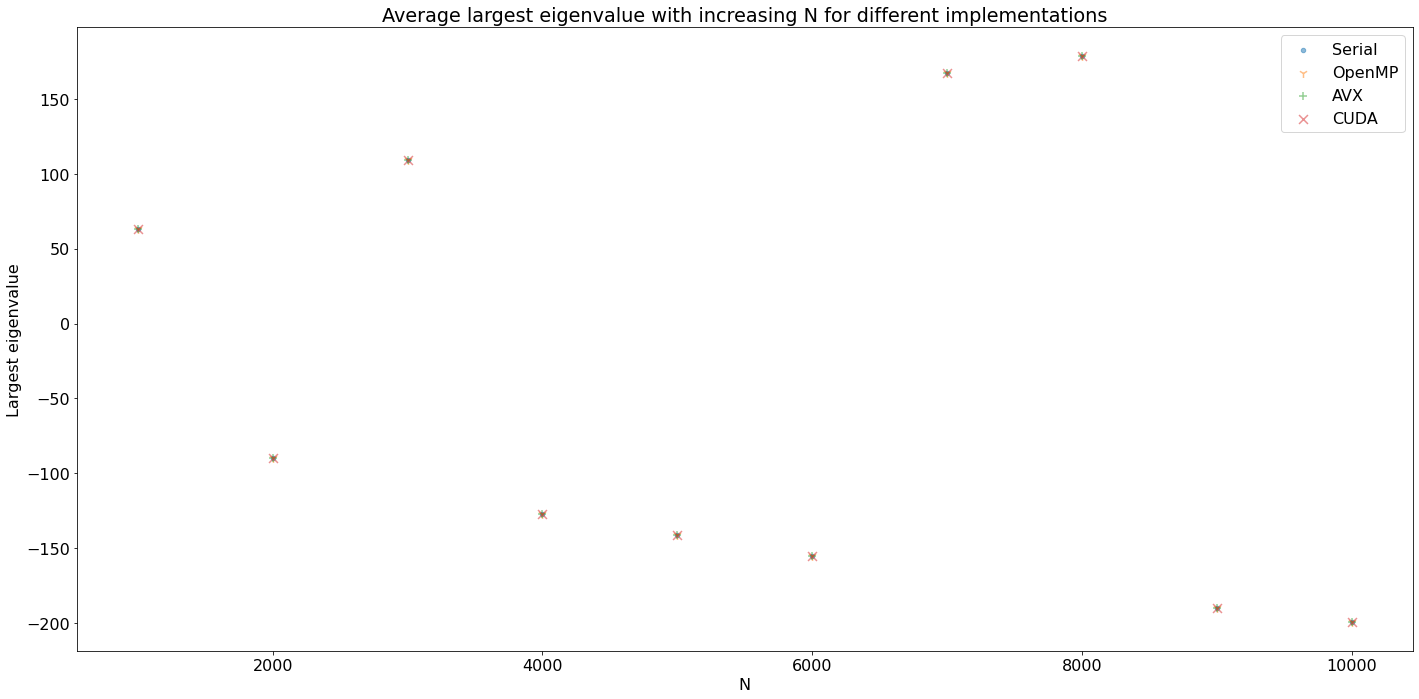

In [4]:
plt.figure(figsize=(20, 10))
plt.scatter(Ns, eig_serial, marker=".", s=80, alpha=0.5, label="Serial")
plt.scatter(Ns, eig_openmp, marker="1", s=80, alpha=0.5, label="OpenMP")
plt.scatter(Ns, eig_avx, marker="+", s=80, alpha=0.5, label="AVX")
plt.scatter(Ns, eig_cuda, marker="x", s=80, alpha=0.5, label="CUDA")
plt.xlabel("N")
plt.ylabel("Largest eigenvalue")
plt.title("Average largest eigenvalue with increasing N for different implementations")
plt.legend()
plt.tight_layout()
plt.savefig("avg_eig.png", facecolor="w")

### Average total initialisation time

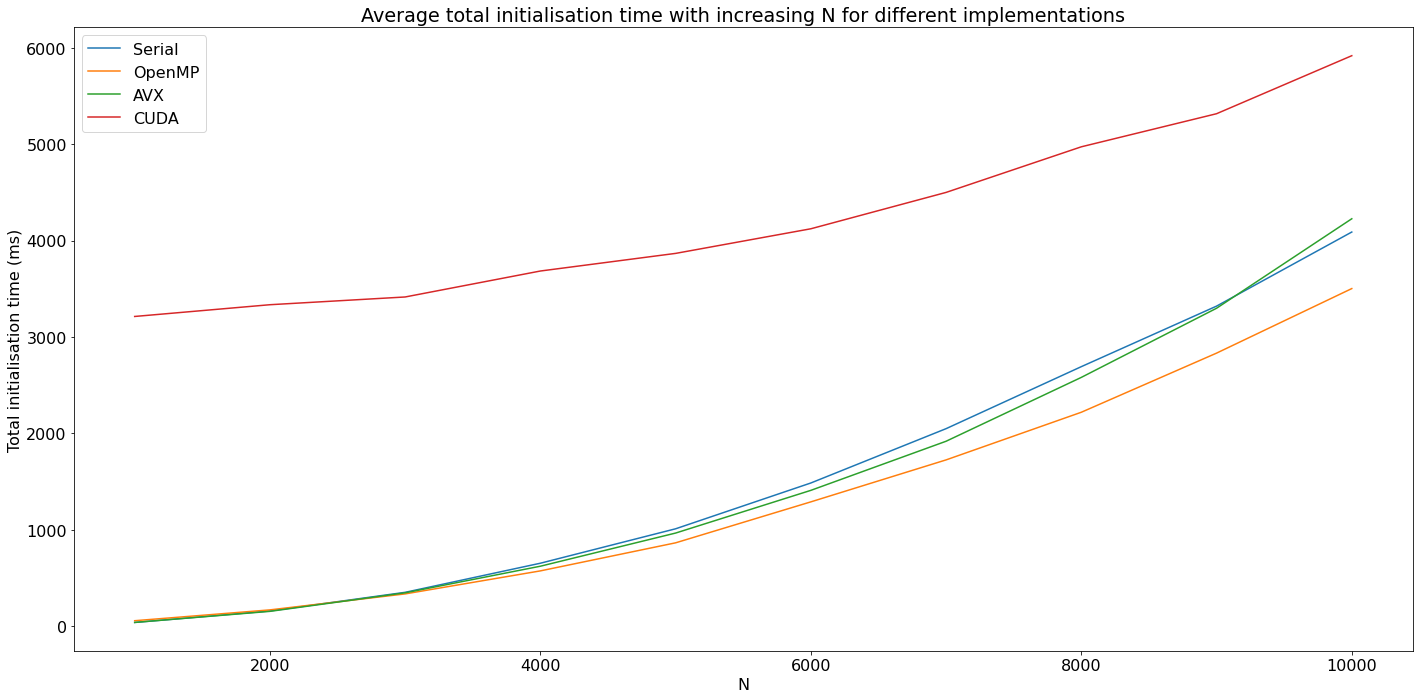

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(Ns, init_serial, label="Serial")
plt.plot(Ns, init_openmp, label="OpenMP")
plt.plot(Ns, init_avx, label="AVX")
plt.plot(Ns, init_cuda, label="CUDA")
# plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Total initialisation time (ms)")
plt.title("Average total initialisation time with increasing N for different implementations")
plt.legend()
plt.tight_layout()
plt.savefig("avg_init.png", facecolor="w")

### Average total time used by MatrixVectorMultiply()

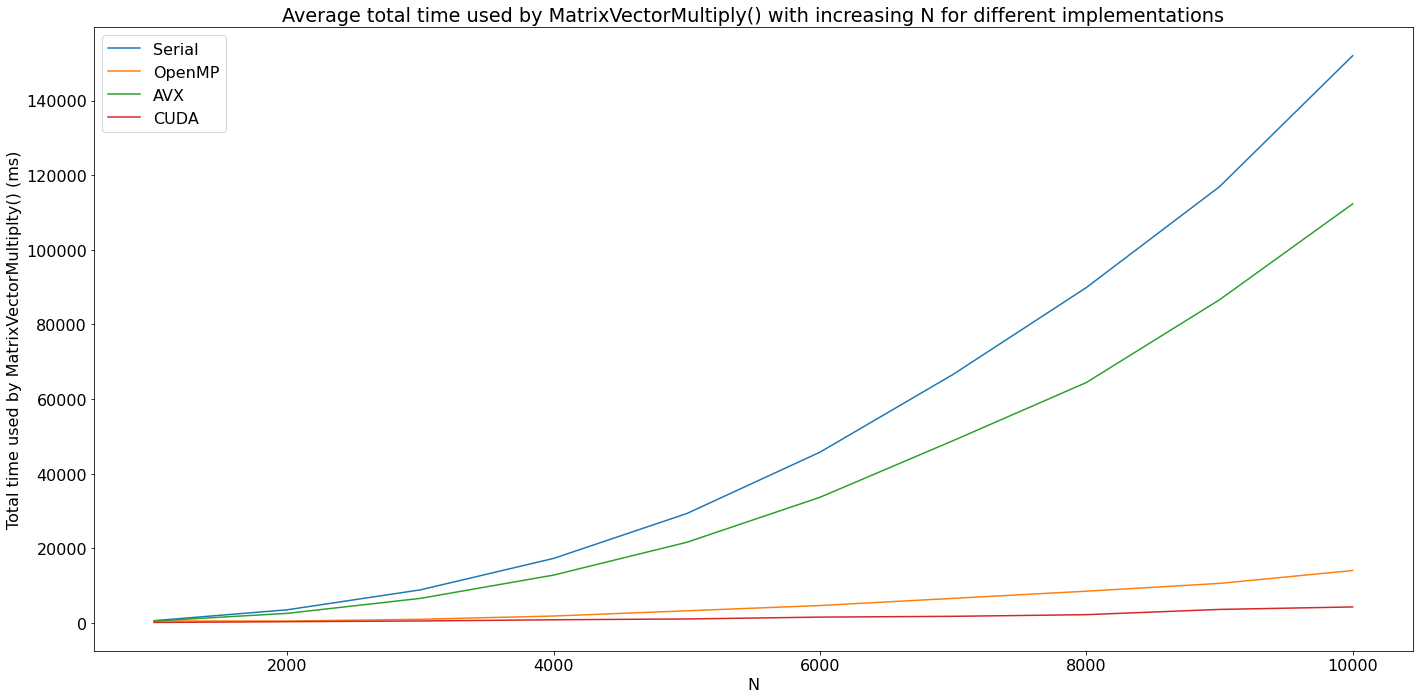

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(Ns, matvecmul_serial, label="Serial")
plt.plot(Ns, matvecmul_openmp, label="OpenMP")
plt.plot(Ns, matvecmul_avx, label="AVX")
plt.plot(Ns, matvecmul_cuda, label="CUDA")
# plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Total time used by MatrixVectorMultiplty() (ms)")
plt.title("Average total time used by MatrixVectorMultiply() with increasing N for different implementations")
plt.legend()
plt.tight_layout()
plt.savefig("avg_matvecmul.png", facecolor="w")

### Average time used per MatrixVectorMultiply() call

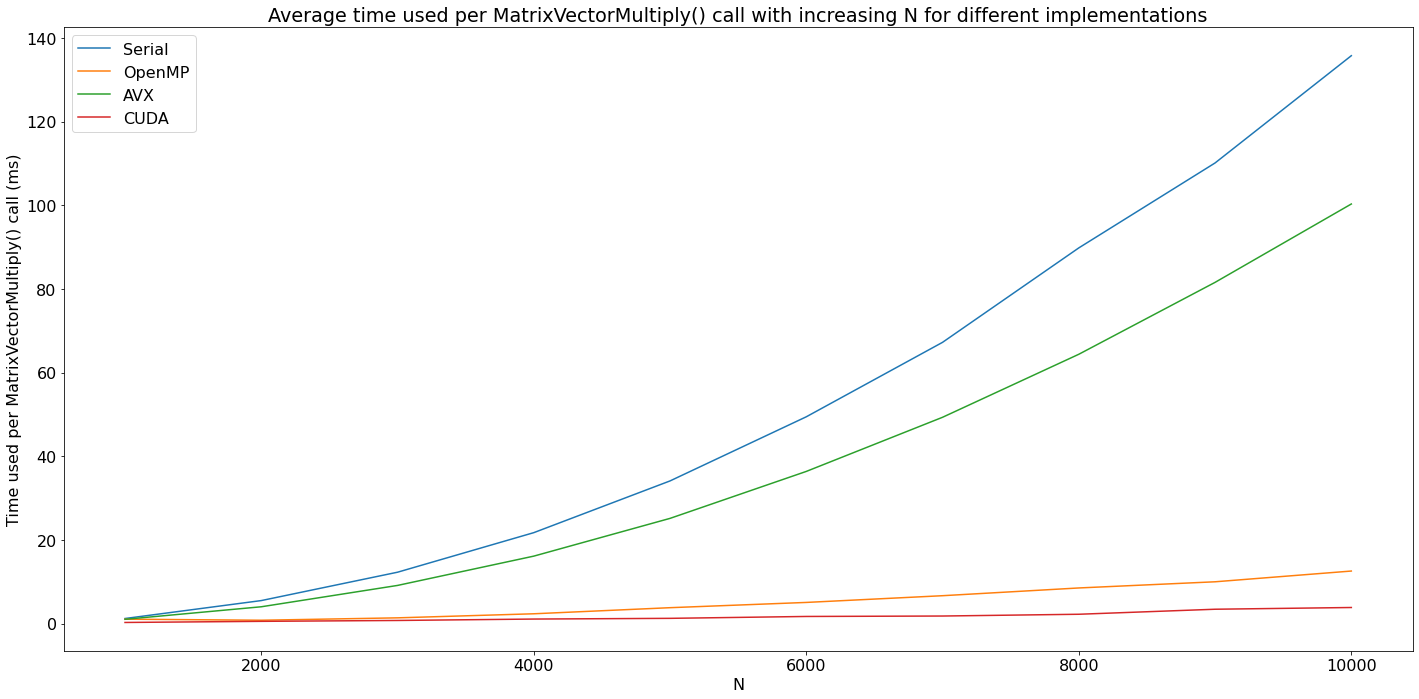

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(Ns, per_matvecmul_serial, label="Serial")
plt.plot(Ns, per_matvecmul_openmp, label="OpenMP")
plt.plot(Ns, per_matvecmul_avx, label="AVX")
plt.plot(Ns, per_matvecmul_cuda, label="CUDA")
# plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Time used per MatrixVectorMultiply() call (ms)")
plt.title("Average time used per MatrixVectorMultiply() call with increasing N for different implementations")
plt.legend()
plt.tight_layout()
plt.savefig("avg_per_matvecmul.png", facecolor="w")

### Average total runtime

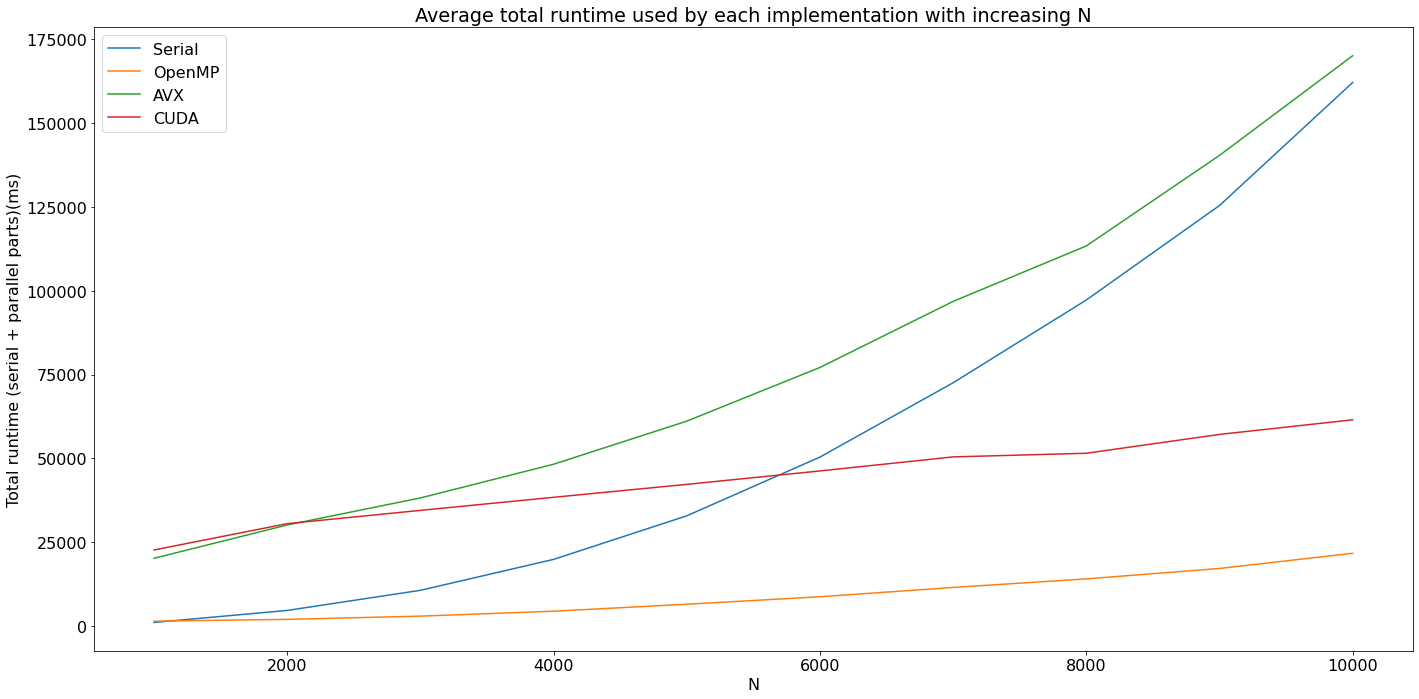

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(Ns, total_serial, label="Serial")
plt.plot(Ns, total_openmp, label="OpenMP")
plt.plot(Ns, total_avx, label="AVX")
plt.plot(Ns, total_cuda, label="CUDA")
# plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Total runtime (serial + parallel parts)(ms)")
plt.title("Average total runtime used by each implementation with increasing N")
plt.legend()
plt.tight_layout()
plt.savefig("avg_total.png", facecolor="w")